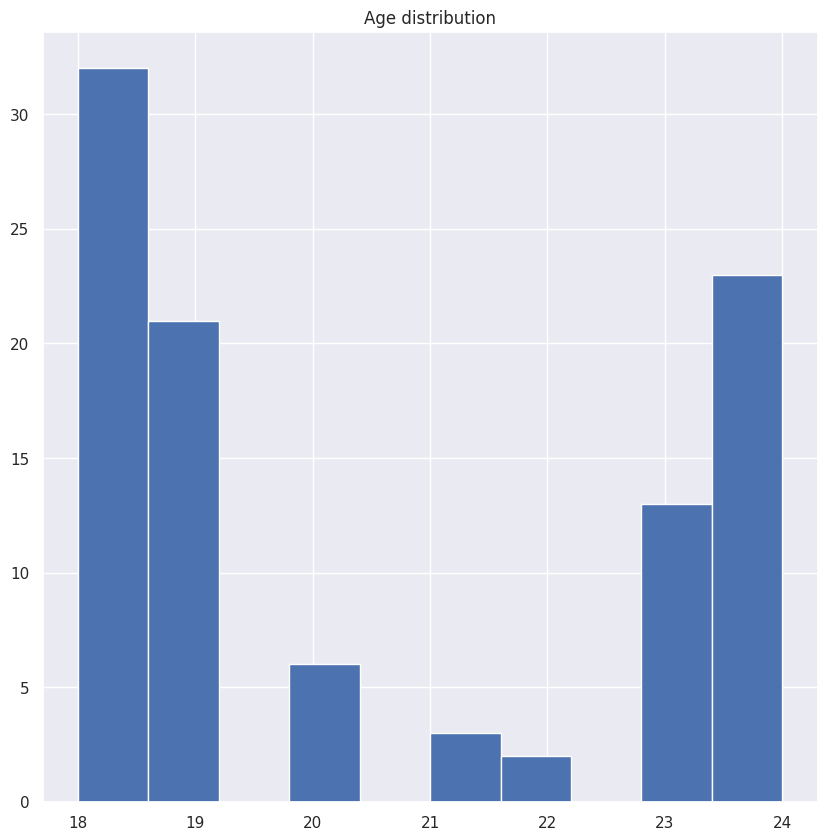

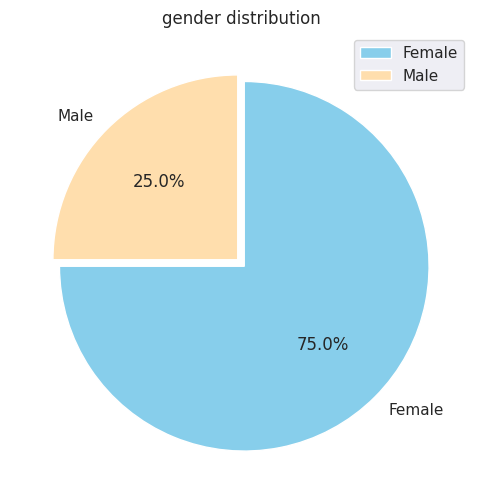

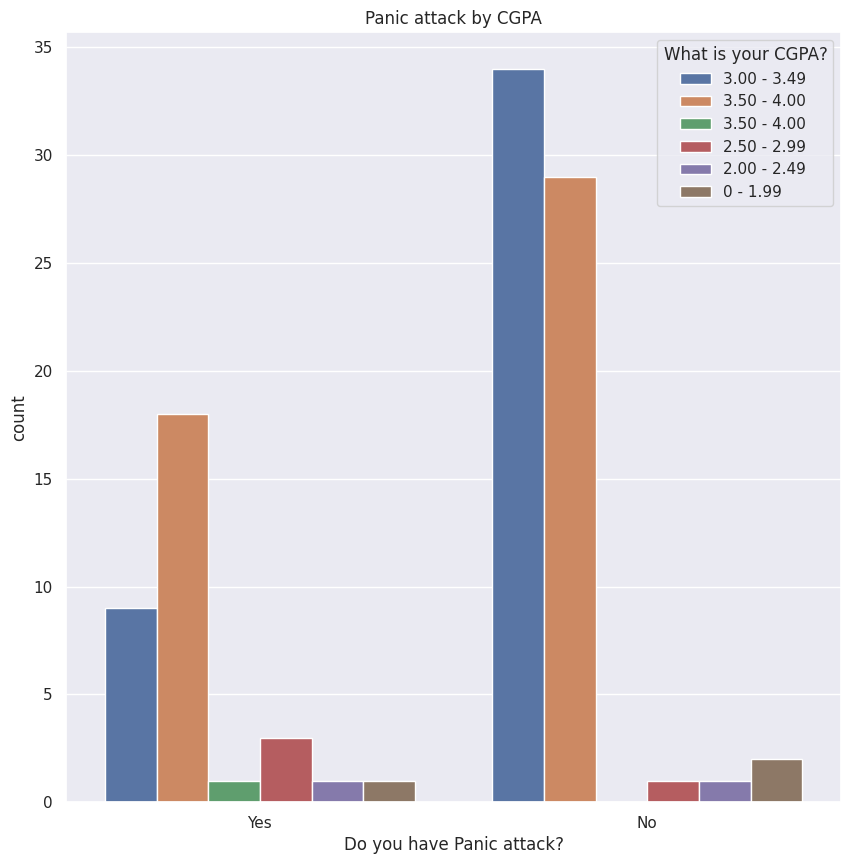

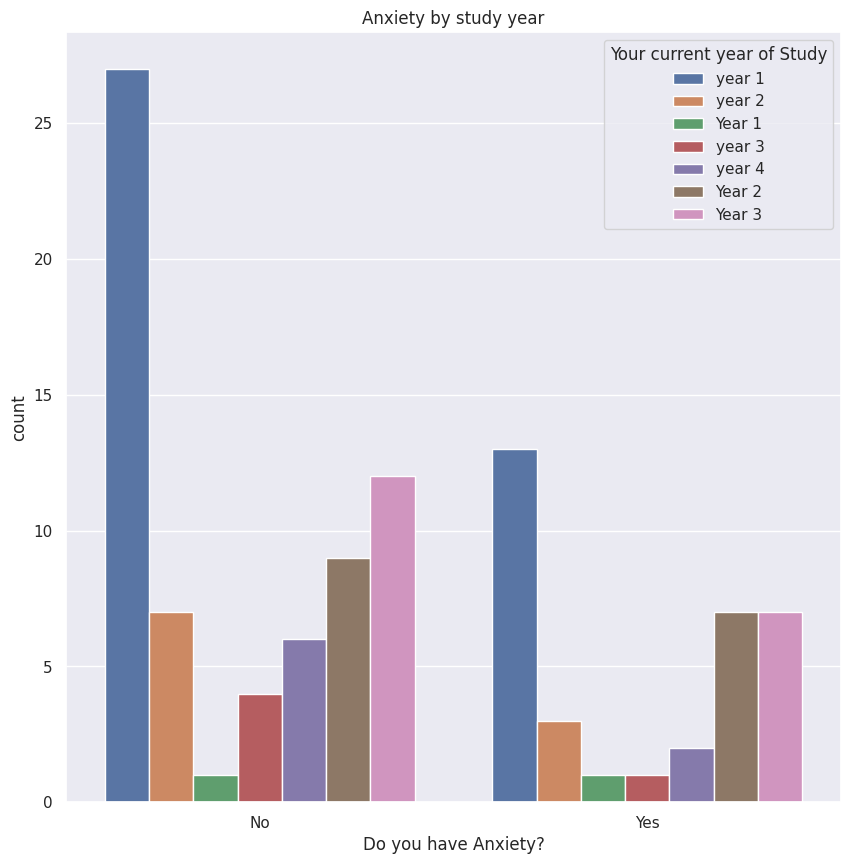

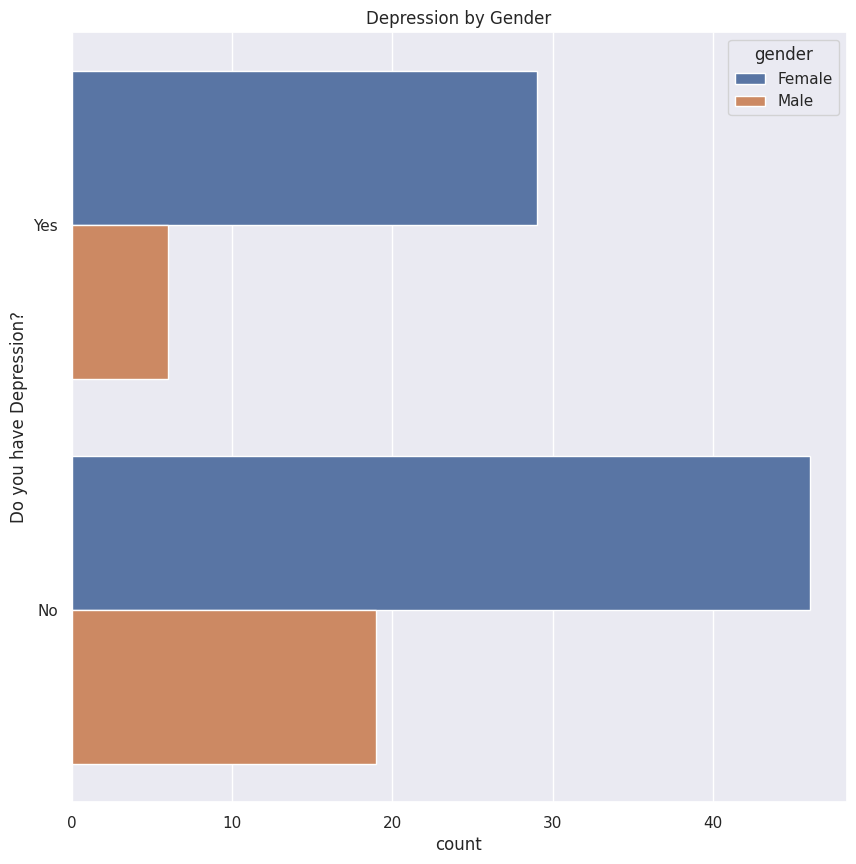

<ipython-input-5-2d4e19afe426>:83: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  data.set_axis(['Country','Year','Schizophrenia', 'Bipolar_disorder', 'Eating_disorder','Anxiety','drug_usage','depression','alcohol','mental_fitness'], axis='columns', inplace=True)
<ipython-input-5-2d4e19afe426>:90: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='Blues')


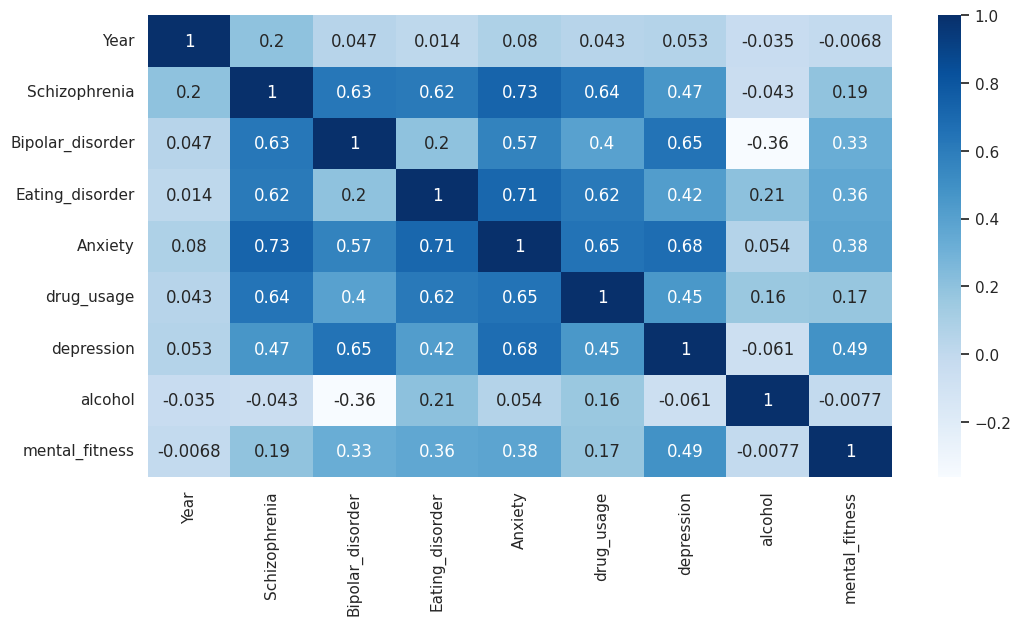

In [ ]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import plotly.express as px
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import datetime
import random
import os


#DATASET 1

# READING DATA
df = pd.read_csv('student_mental_health.csv')

df.head()

df.shape

df.dtypes

df.nunique()

df.isnull().sum() # DATA CLEANING

df = df.dropna(how='any',axis=0) 

df.isnull().sum()

plt.figure(figsize=(10,10)) # START DATA VISUALIZATION
plt.hist(df['Age'],color='b')
plt.title("Age distribution");

df.rename(columns = {'Choose your gender': 'gender'}, inplace = True)

plt.figure(figsize=(12,6))
plt.title("gender distribution")
g = plt.pie(df.gender.value_counts(), explode=(0.025,0.025), labels=df.gender.value_counts().index, colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()


plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Do you have Panic attack?", hue="What is your CGPA?", data=df)
plt.title("Panic attack by CGPA")
plt.show()

plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Do you have Anxiety?", hue="Your current year of Study", data=df)
plt.title("Anxiety by study year")
plt.show()

plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="Do you have Depression?", hue="gender", data=df)
plt.title("Depression by Gender")
plt.show()

# DATASET 2 & 3

df2 = pd.read_csv('mental-and-substance-use-as-share-of-disease.csv')
df3 = pd.read_csv('prevalence-by-mental-and-substance-use-disorder.csv')

df2.head()
df3.head()

data = pd.merge(df2, df3) # Merging Two Datasets
data.head()

data.isnull().sum() # Data Cleaning

data.drop('Code',axis=1,inplace=True)

data.head()

data.size,data.shape

data.set_axis(['Country','Year','Schizophrenia', 'Bipolar_disorder', 'Eating_disorder','Anxiety','drug_usage','depression','alcohol','mental_fitness'], axis='columns', inplace=True)

data.head()

# Data Visualization

plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.plot()

mean = data['mental_fitness'].mean()
mean

fig = px.pie(data, values='mental_fitness', names='Year')
fig.show()

fig=px.bar(data.head(10),x='Year',y='mental_fitness',color='Year',template='ggplot2')
fig.show()

fig = px.line(data, x="Year", y="mental_fitness", color='Country',markers=True,color_discrete_sequence=['red','blue'],template='plotly_dark')
fig.show()
